In [48]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('C:\\home\\eldridge\\proj\\puzzler\\pieces\piece_C1.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, mask0 = cv.threshold(gray,130,255,cv.THRESH_BINARY)
_, mask1 = cv.threshold(gray,200,255,cv.THRESH_BINARY_INV)
mask2 = mask0 * mask1


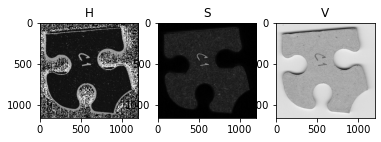

In [71]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV_FULL)

plt.subplot(131)
plt.imshow(hsv[:,:,0], cmap='gray')
plt.title('H')

plt.subplot(132)
plt.imshow(hsv[:,:,1], cmap='gray')
plt.title('S')

plt.subplot(133)
plt.imshow(hsv[:,:,2], cmap='gray')
plt.title('V')

plt.show()

In [72]:
cv.imwrite('saturation.jpg', hsv[:,:,1])


True

364 -321 510 -342


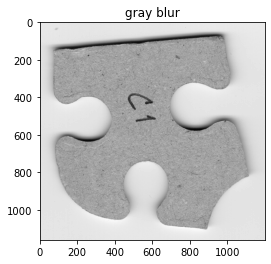

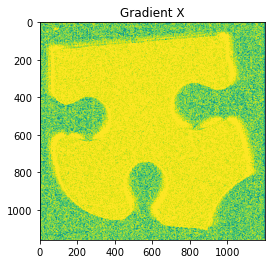

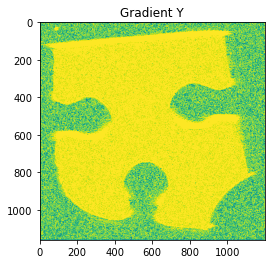

In [67]:
blur = cv.GaussianBlur(gray, (3,3), 0, 0)

ksize = 3
scale = 1
delta = 0
grad_x = cv.Sobel(blur, cv.CV_16S, 1, 0, ksize=ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(blur, cv.CV_16S, 0, 1, ksize=ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
print(np.max(grad_x), np.min(grad_x), np.max(grad_y), np.min(grad_y))
max_x = np.max(grad_x)
min_x = np.min(grad_x)
max_y = np.max(grad_y)
min_y = np.min(grad_y)
scale = max(abs(i) for i in [max_x, min_x, max_y, min_y])
abs_grad_x = cv.convertScaleAbs(grad_x, scale/128, 128)
abs_grad_y = cv.convertScaleAbs(grad_y, scale/128, 128)
grad = cv.addWeighted(abs_grad_x, .5, abs_grad_y, .5, 0)

plt.imshow(blur, cmap='gray')
plt.title('gray blur')
plt.show()

plt.imshow(abs_grad_x)
plt.title('Gradient X')
plt.show()

plt.imshow(abs_grad_y)
plt.title('Gradient Y')
plt.show()

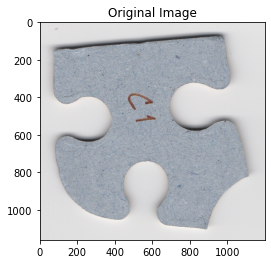

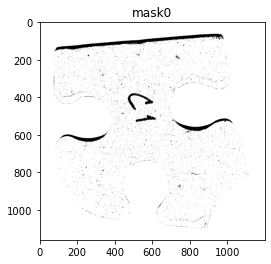

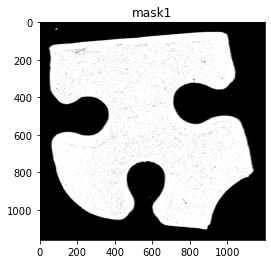

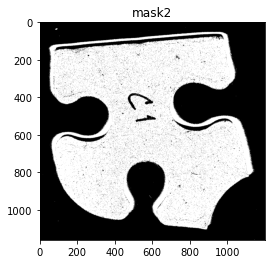

In [49]:
plt.imshow(img)
plt.title('Original Image')
plt.show()

plt.imshow(mask0,cmap = 'gray')
plt.title('mask0')
plt.show()

plt.imshow(mask1,cmap='gray')
plt.title('mask1')
plt.show()

plt.imshow(mask2,cmap='gray')
plt.title('mask2')
plt.show()

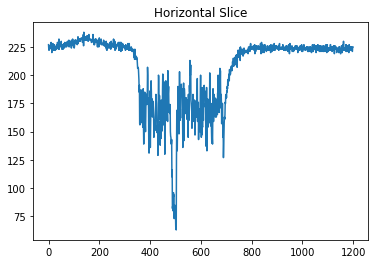

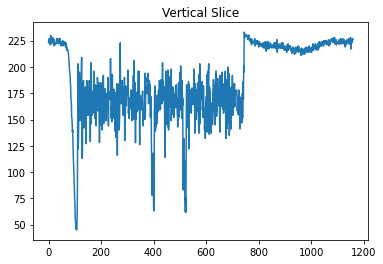

In [47]:
plt.plot(gray[450])
plt.title('Horizontal Slice')
plt.show()

plt.plot(gray[:,550])
plt.title("Vertical Slice")
plt.show()

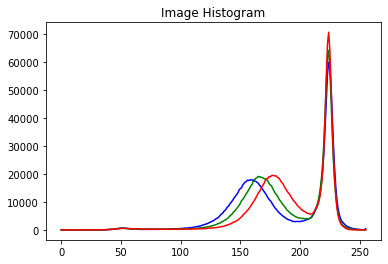

In [40]:
for i, color in enumerate('bgr'):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title('Image Histogram')
plt.show()